In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from astropy.table import Table

from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# https://arxiv.org/abs/2012.02061
GCNS_file = '../lonely_stars/GCNS_cat.fits'
GCNS = Table.read(GCNS_file, format='fits')

GCNS_c = SkyCoord(GCNS['RA'].value*u.degree, GCNS['DEC'].value*u.degree)

# past me already did this, yay! 
# https://github.com/jradavenport/lonely_stars/blob/main/GCNS_KDTree.ipynb
# c1 = SkyCoord(ra = GCNS['RA'] * u.degree,
#               dec = GCNS['DEC'] * u.degree,
#               distance= GCNS['DIST_50'] * u.kpc,
#               frame='icrs')


In [4]:
# Gaia ESO
# https://doi.eso.org/10.18727/archive/25
GaiaESO = Table.read('GaiaESO.fits', format='fits')
# GaiaESO.columns
len(GaiaESO)

114916

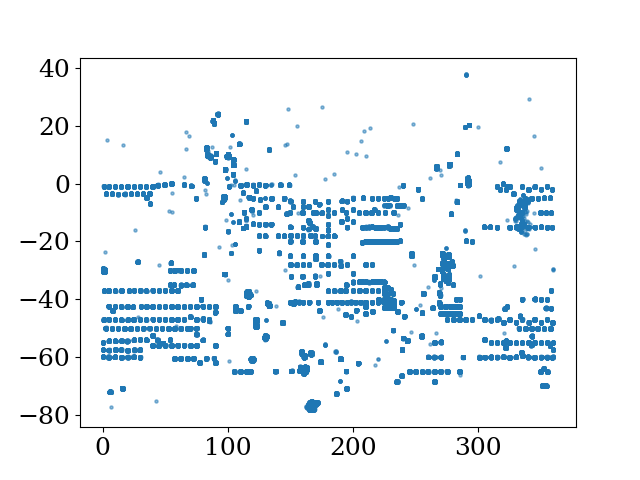

In [5]:
plt.figure()
plt.scatter(GaiaESO['RA'], GaiaESO['DECLINATION'], s=5, alpha=0.5)

In [6]:
# GESO = GaiaESO.to_pandas().drop_duplicates(subset='OBJECT')
# GaiaESO

In [7]:
# HARPS
# https://doi.eso.org/10.18727/archive/33
HARPS = Table.read('HARPS.fits', format='fits')
print(len(HARPS))

Hdf = HARPS.to_pandas()
print(Hdf.shape)

289843
(289843, 52)


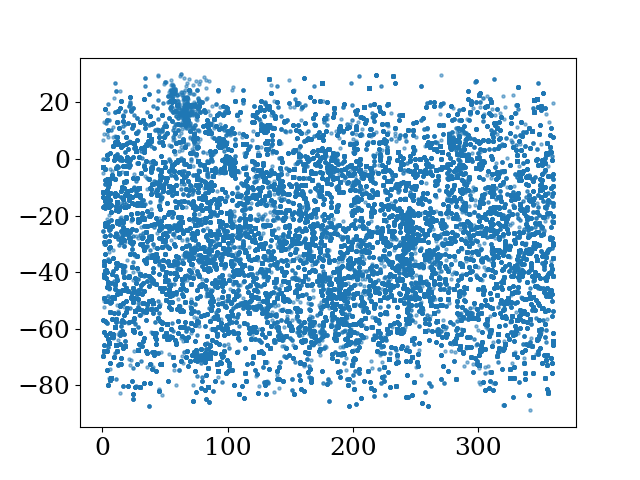

In [8]:
plt.figure()
plt.scatter(HARPS['ra_simbad'], HARPS['dec_simbad'], s=5, alpha=0.5)

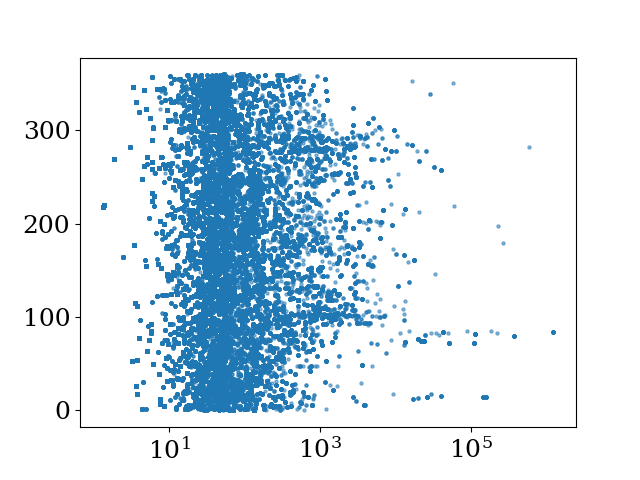

In [9]:
plt.figure()
plt.scatter(1000./HARPS['plx_simbad'], HARPS['ra_simbad'], s=5, alpha=0.5)
plt.xscale('log')

(8125, 52)


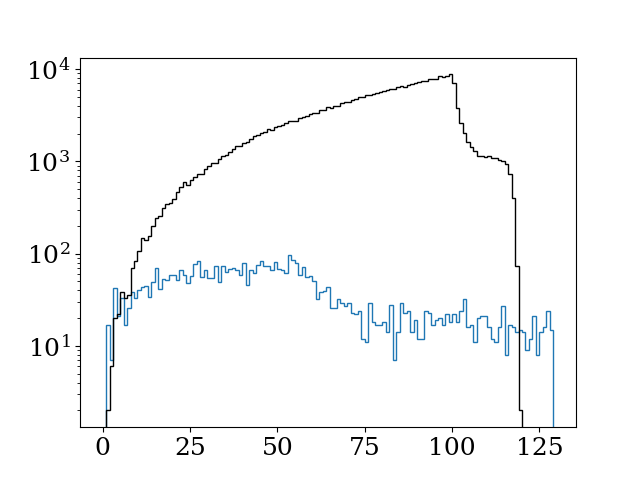

In [10]:
Hdf = Hdf.drop_duplicates(subset='tel_object')
print(Hdf.shape)
plt.figure()
_=plt.hist(1000./Hdf['plx_simbad'],histtype='step', bins=np.arange(0,130,1), label='HARPS')
_=plt.hist(GCNS['DIST_50']*1000, histtype='step', bins=np.arange(0,130,1), color='k', label='GCNS')
plt.yscale('log')

In [11]:
sum(1000./Hdf['plx_simbad'] < 120)

4651

In [12]:
# https://neid.ipac.caltech.edu/search.php
neid = pd.read_csv('neid_level2.csv')
print(neid.shape)

# neid = neid.drop_duplicates(subset='object')
# print(neid.shape)

(12851, 21)


In [13]:
neid

,filename,object,qobject,qra,qdec,obsdate,exptime,obsmode,obstype,program,...,sunagl,airmass,seeing,moonagl,ccfjdsum,ccfrvmod,dvrms,swversion,extsnr,flagged
0,neidL2_20250424T111555.fits,TIC 325554331,Gaia DR2 4472832130942575872,17:57:47.6674,+04:44:16.731,2025-04-24 11:15:55,679.774663,hr,Sci,2025A-2014,...,-18.6872,1.1241,0.0,59.6281,2.460790e+06,-110.2421,0.0016,v1.4.2,76.3139,0
1,neidL2_20250424T104033.fits,HD 185144,Gaia DR2 2261614264930275072,19:32:23.3663,+69:39:13.293,2025-04-24 10:40:33,450.079819,hr,Sci,2025A-2014,...,-25.0160,1.3383,0.0,99.0580,2.460790e+06,26.7350,0.0002,v1.4.2,371.4173,0
2,neidL2_20250424T103134.fits,HD 185144,Gaia DR2 2261614264930275072,19:32:23.3663,+69:39:13.293,2025-04-24 10:31:34,499.911066,hr,Sci,2025A-2014,...,-26.5467,1.3497,0.0,99.0580,2.460790e+06,26.7351,0.0003,v1.4.2,345.7272,0
3,neidL2_20250424T102236.fits,HD 185144,Gaia DR2 2261614264930275072,19:32:23.3663,+69:39:13.293,2025-04-24 10:22:36,499.970979,hr,Sci,2025A-2014,...,-28.0399,1.3619,0.0,99.0585,2.460790e+06,26.7346,0.0003,v1.4.2,362.6240,0
4,neidL2_20250423T054635.fits,HD 127334,Gaia DR2 1491593733326694912,14:29:37.0324,+41:47:41.870,2025-04-23 05:46:35,694.790729,hr,Sci,2025A-2014,...,-39.6119,1.1173,0.0,54.6879,2.460789e+06,-0.4293,0.0003,v1.4.2,327.4382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12846,neidL2_20201208T124625.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:30:54,901.968201,hr,Eng,2020B-2001,...,-21.4868,1.0223,0.0,66.3985,2.459192e+06,-10.4012,0.0000,v0.5.2,NaN,1
12847,neidL2_20201208T123045.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:15:13,902.636536,hr,Eng,2020B-2001,...,-24.7213,1.0247,0.0,66.4061,2.459192e+06,-10.3994,0.0000,v0.5.2,NaN,1
12848,neidL2_20201208T121418.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:13:44,4.723731,hr,Eng,2020B-2001,...,-25.0303,1.0252,0.0,66.4069,2.459192e+06,-10.3865,0.0000,v0.5.2,NaN,1
12849,neidL2_20201208T121336.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:06:49,377.139856,hr,Eng,2020B-2001,...,-26.4649,1.0272,0.0,66.4106,2.459192e+06,-10.4017,0.0000,v0.5.2,NaN,1


In [14]:
kpf = pd.read_csv('kpf.csv')
print(kpf.shape)

# kpf = kpf.drop_duplicates(subset=('targname','object'))
# print(kpf.shape)

(304107, 24)


In [15]:
kpf['koaimtyp'].unique()

array(['undefined', 'object', 'arclamp', 'bias', 'dark', 'flatlamp',
       'solar'], dtype=object)

In [16]:
kpf = kpf[(kpf['koaimtyp'] == 'object')]
print(kpf.shape)
kpf['obj2'] = kpf['object'].astype(str).values + kpf['targname'].astype(str).values
print(kpf.shape)

(10094, 24)
(10094, 25)


In [17]:
kpf['obj2'].unique().size

1837

In [18]:
HIRES = pd.read_csv('hires.csv')
print(HIRES.shape)
HIRES = HIRES[HIRES['koaimtyp'] == 'object']
print(HIRES.shape)

(477635, 26)
(190714, 26)


In [19]:
HIRES['obj2'] = HIRES['targname'].astype(str).values + HIRES['object'].astype(str).values

In [20]:
HIRES['obj2'].unique().size

50352

In [21]:
HIRES['object'].unique().size

13179

In [22]:
print(HIRES['ra'].values.size)
sum(np.isfinite(HIRES['ra'].values))

190714


190711

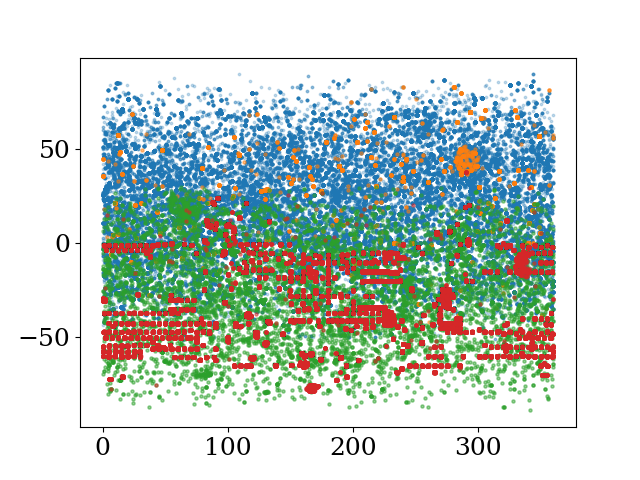

In [23]:
plt.figure()
plt.scatter(HIRES['ra'], HIRES['dec'], s=3, alpha=0.25, label='HIRES')
plt.scatter(kpf['ra'], kpf['dec'], alpha=.5, s=5, label='KPF (N=1837)')
plt.scatter(Hdf['ra_simbad'], Hdf['dec_simbad'], s=5, alpha=0.5, label='HARPS (N=8125)')
plt.scatter(GaiaESO['RA'], GaiaESO['DECLINATION'], s=5, alpha=0.5, label='GaiaESO')

(128801, 55)


/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_25694/1007179225.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  esp = pd.read_csv('ESPaDOnS.csv')


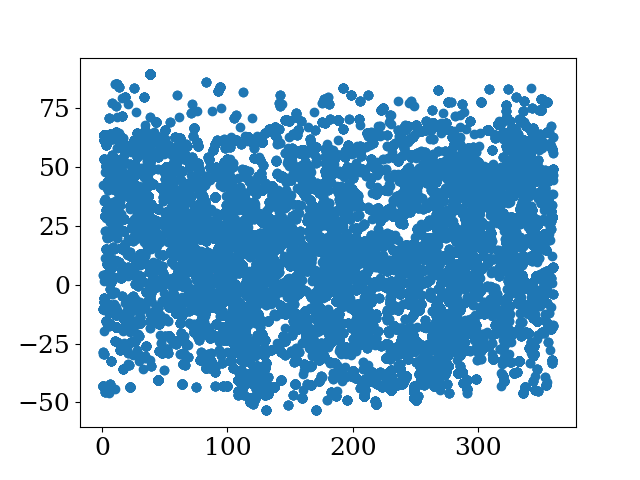

In [24]:
esp = pd.read_csv('ESPaDOnS.csv')
print(esp.shape)
plt.figure()
plt.scatter(esp['"RA (J2000.0)"'], esp['"Dec. (J2000.0)"'])

In [25]:
print(esp['"Target Name"'].unique().size)

6702


In [26]:
Eok = np.isfinite(esp['"RA (J2000.0)"'].values) & np.isfinite(esp['"Dec. (J2000.0)"'].values)
esp_c = SkyCoord(esp['"RA (J2000.0)"'].values[Eok]*u.degree, esp['"Dec. (J2000.0)"'].values[Eok]*u.degree)
edx = GCNS_c.match_to_catalog_sky(esp_c)
emtch = edx[0][edx[1].to('arcsec').value < 5]
print(sum(edx[1].to('arcsec').value < 5))

1482


In [27]:
Hiok = np.isfinite(HIRES['ra'].values) & np.isfinite(HIRES['dec'].values)
HIRES_c = SkyCoord(HIRES['ra'].values[Hiok]*u.degree, HIRES['dec'].values[Hiok]*u.degree)
Hidx = GCNS_c.match_to_catalog_sky(HIRES_c)
Himtch = Hidx[0][Hidx[1].to('arcsec').value < 5]
print(sum(Hidx[1].to('arcsec').value < 5))

4189


In [28]:
HAok = np.isfinite(Hdf['ra_simbad'].values) & np.isfinite(Hdf['dec_simbad'].values)
HARPS_c = SkyCoord(Hdf['ra_simbad'].values[HAok]*u.degree, Hdf['dec_simbad'].values[HAok]*u.degree)

HAdx = GCNS_c.match_to_catalog_sky(HARPS_c)
HAmtch = HAdx[0][HAdx[1].to('arcsec').value < 5]
print(sum(HAdx[1].to('arcsec').value < 5))

2812


In [29]:
GaiaESO_C = SkyCoord(GaiaESO['RA'].value*u.degree, GaiaESO['DECLINATION'].value*u.degree)
Gdx = GCNS_c.match_to_catalog_sky(GaiaESO_C)
Gmtch = Gdx[0][Gdx[1].to('arcsec').value < 5]
print(sum(Gdx[1].to('arcsec').value < 5))

147


In [30]:
kpf_c = SkyCoord(kpf['ra'].values*u.degree, kpf['dec'].values*u.degree)
kdx = GCNS_c.match_to_catalog_sky(kpf_c)
kmtch = kdx[0][kdx[1].to('arcsec').value < 5]
print(sum(kdx[1].to('arcsec').value < 5))

118


In [31]:
neid_c = SkyCoord(neid['qra'].values, neid['qdec'].values, unit=(u.hourangle, u.deg))
nok = (np.isfinite(neid_c.ra.value)) & (np.isfinite(neid_c.dec.value))
neid_c = neid_c[nok]
ndx = GCNS_c.match_to_catalog_sky(neid_c)
nmtch = ndx[0][ndx[1].to('arcsec').value < 5]
print(sum(ndx[1].to('arcsec').value < 5))

267


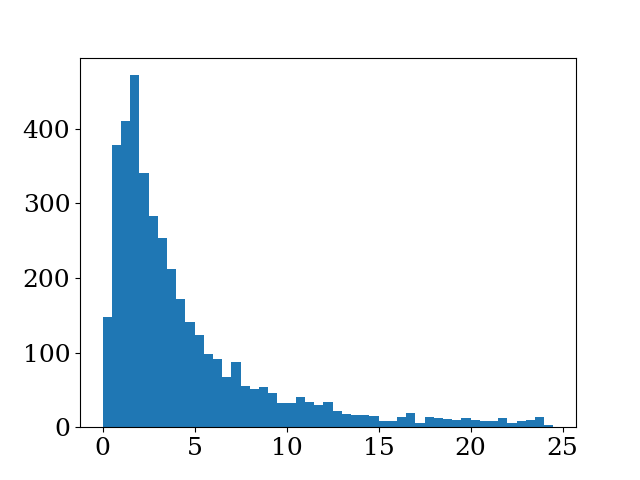

In [32]:
plt.figure()
# _ = plt.hist(Hidx[1].to('arcsec').value,bins=np.arange(0,25,.5))
_ = plt.hist(HAdx[1].to('arcsec').value,bins=np.arange(0,25,.5))

In [33]:
sum(Hidx[1].to('arcsec').value < 2)

2509

In [35]:
GaiaESO_C.dec.value[Gdx[0]][-1]

-29.8601944444439

In [36]:
# sum(Gdx[1].to('arcsec').value < 2)
HasSpec = (Hidx[1].to('arcsec').value < 2)
sum(HasSpec)

2509

7599


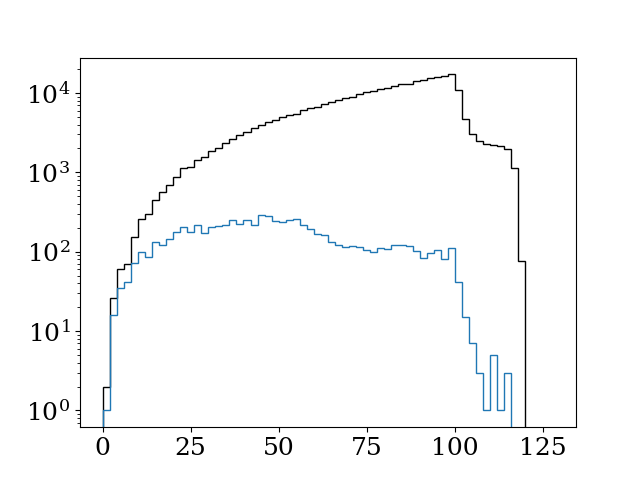

In [37]:
sep = 5
HasSpec = ((Gdx[1].to('arcsec').value < sep) + 
           (Hidx[1].to('arcsec').value < sep) + 
           (HAdx[1].to('arcsec').value < sep) + 
           (kdx[1].to('arcsec').value < sep) +
           (edx[1].to('arcsec').value < sep) +
           (ndx[1].to('arcsec').value < sep))

print(sum(HasSpec))

plt.figure()
N2,B2,_ = plt.hist(GCNS['DIST_50']*1000, histtype='step', bins=np.arange(0,130,2), color='k', label='GCNS')
N1,B1,_ = plt.hist(GCNS['DIST_50'][HasSpec]*1000, histtype='step', bins=np.arange(0,130,2))
plt.yscale('log')

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_25694/1415181806.py:3: RuntimeWarning: invalid value encountered in divide
  plt.step(B2[1:], N1/N2)


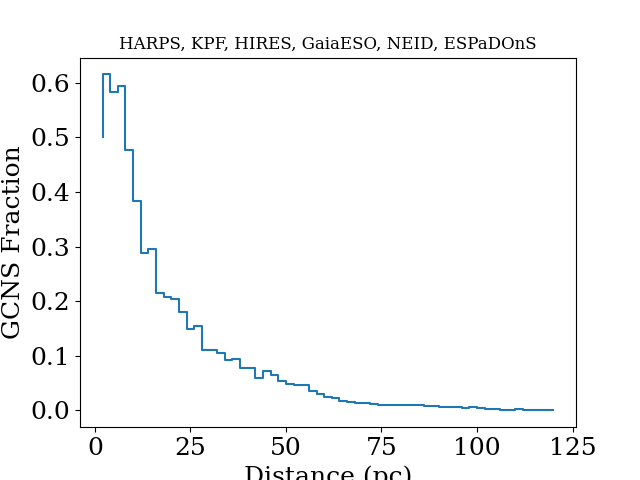

In [38]:
plt.figure()
plt.plot()
plt.step(B2[1:], N1/N2)
plt.xlabel('Distance (pc)')
plt.ylabel('GCNS Fraction')
plt.title('HARPS, KPF, HIRES, GaiaESO, NEID, ESPaDOnS',fontsize=12)

plt.savefig('frac_v1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

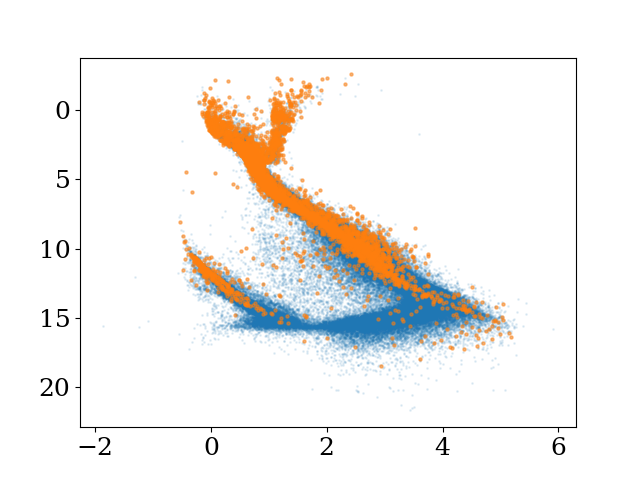

In [76]:
GCNSdf = GCNS.to_pandas()
plt.figure()
_ = plt.scatter(GCNSdf['PHOT_BP_MEAN_MAG'].values - GCNSdf['PHOT_RP_MEAN_MAG'].values, 
               GCNSdf['PHOT_G_MEAN_MAG'].values - 5*np.log10(GCNSdf['DIST_50'].values*1000) + 5, s=1,alpha=0.1)

_ = plt.scatter(GCNSdf['PHOT_BP_MEAN_MAG'].values[HasSpec] - GCNSdf['PHOT_RP_MEAN_MAG'].values[HasSpec], 
               GCNSdf['PHOT_G_MEAN_MAG'].values[HasSpec] - 5*np.log10(GCNSdf['DIST_50'].values[HasSpec]*1000) + 5, s=5, alpha=0.5)

plt.gca().invert_yaxis()

In [65]:
np.max(GCNSdf['DIST_50'].values[HasSpec]*1000)

115.33055000055161